In [2]:
# Librerias necesarias para modelo de regresión logística
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [6]:
import os
import pandas as pd
import numpy as np

# Accedemos a cada train y a cada test tanto de X como de Y, y los dejamos metidos en variables para el siguiente paso!! 
# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
 
BASE_PATH = "/Users/julian/Desktop/vs code/Decision_tree_model_for_machine_learning_Project_16_Julian_Lopez/Decision_tree_model_for_machine_learning_Project_16_Julian_Lopez/data/processed/Excels"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    'X_train_con_outliers_k7.xlsx',
    'X_train_sel_k6.xlsx',
    'X_train_sel_k5.xlsx',
    'X_train_sel_k4.xlsx'
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}") 
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    'X_test_con_outliers_k7.xlsx',
    'X_test_sel_k6.xlsx',
    'X_test_sel_k5.xlsx',
    'X_test_sel_k4.xlsx'
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

### Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Le pasamos los train y los test al modelo , lo entrenamos y metemos los resultados del test en una lista para poder comparar y escoger el mejor. 

results = []

for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = DecisionTreeClassifier(random_state = 77 )
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )

results

0
1
2
3
4
5


[{'train': 1.0, 'test': 0.7467532467532467},
 {'train': 1.0, 'test': 0.7337662337662337},
 {'train': 1.0, 'test': 0.7597402597402597},
 {'train': 1.0, 'test': 0.7207792207792207},
 {'train': 1.0, 'test': 0.7467532467532467},
 {'train': 1.0, 'test': 0.6883116883116883}]

In [8]:
# Optimización del modelo. 

best_dataset = 0 # Porque de results, el mayor acuracy en train y test.

# Ponemos los hyperparametros según la documentación.  

hyperparams = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}


from sklearn.model_selection import GridSearchCV 

model = DecisionTreeClassifier(random_state = 77) # Volvemos a seleccionar el modelo sin entrenar. 
grid = GridSearchCV(model, hyperparams, scoring = "accuracy") # Metemos en el gris los nuevos hyperparametros

In [20]:
# Entrenamos el modelo con los nuevos parametros. 

grid.fit(TRAIN_DATASETS[best_dataset], y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=77),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:

grid.best_estimator_

DecisionTreeClassifier(max_features='log2', max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=77)

In [22]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.  

final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

In [23]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')


Score train: (0.8355048859934854,)
Score test: 0.6883116883116883


### Feature selection

In [ ]:
best_dataset = 2 # Porque de results, el mayor acuracy despues de hacer feature selection en train y test.

# Ponemos los hyperparametros según la documentación.  

hyperparams = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}


from sklearn.model_selection import GridSearchCV 

model = DecisionTreeClassifier(random_state = 77) # Volvemos a seleccionar el modelo sin entrenar. 
grid = GridSearchCV(model, hyperparams, scoring = "accuracy") # Metemos en el gris los nuevos hyperparametros

In [14]:
# Entrenamos el modelo con los nuevos parametros. 

grid.fit(TRAIN_DATASETS[best_dataset], y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=77),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [15]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=10, random_state=77)

In [16]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.  

final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

In [17]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.7996742671009772,)
Score test: 0.7727272727272727


### Grafico el modelo

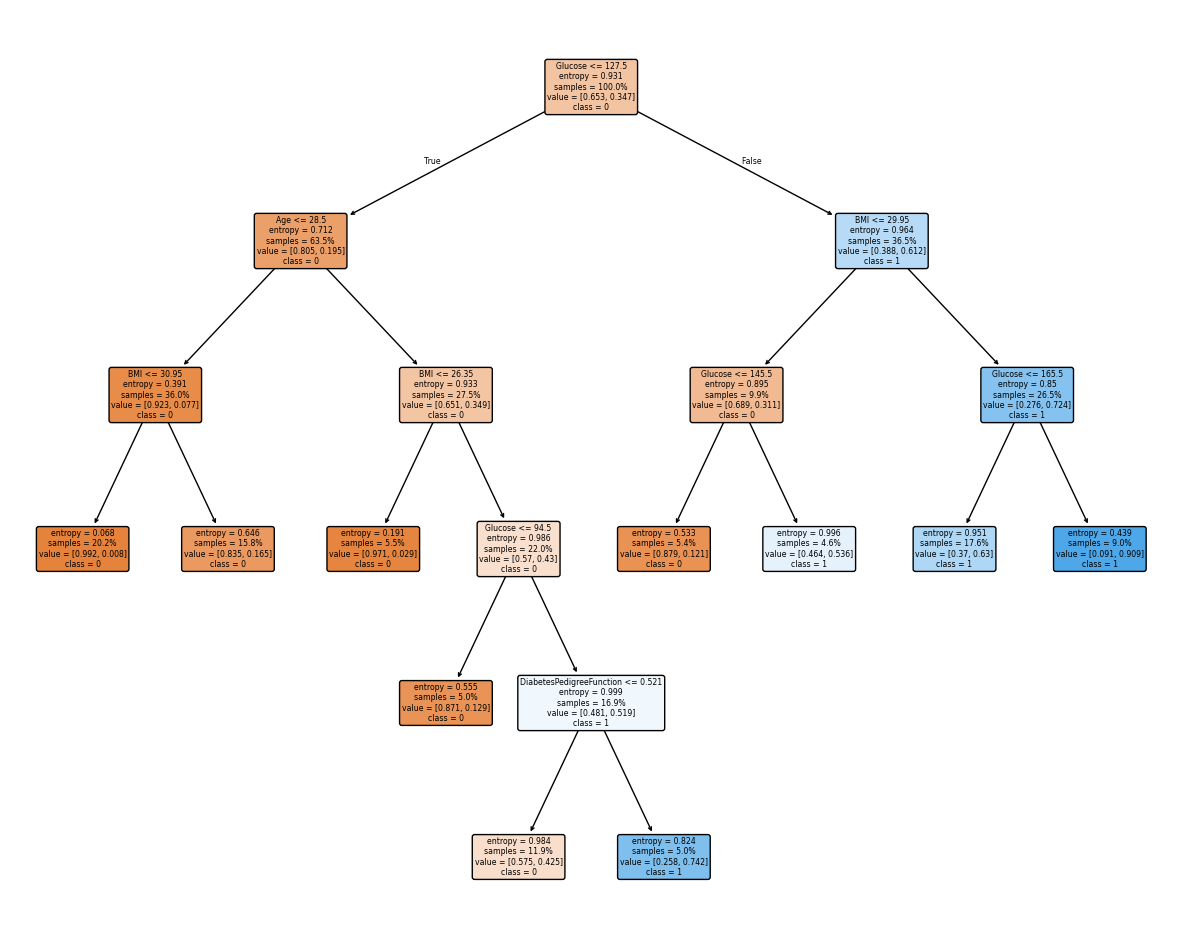

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

final_model = grid.best_estimator_
column_names = TRAIN_DATASETS[best_dataset].columns.tolist()

plt.figure(figsize=(15, 12)) 
plot_tree(final_model, 
          filled = True,  # Colorea los nodos según la clase predicha
          feature_names = column_names,  # Nombres de tus variables predictoras
          class_names = ['0', '1'],  # Nombres de tus clases (target)
          rounded = True,  # Hacer los bordes de los nodos redondeados
          proportion = True)  # Escalar el gráfico de manera que se ajuste mejor
plt.show()


### Guardo el modelo

In [24]:
import pickle

with open("/Users/julian/Desktop/vs code/Decision_tree_model_for_machine_learning_Project_16_Julian_Lopez/Decision_tree_model_for_machine_learning_Project_16_Julian_Lopez/models/Decision_tree_model.sav", "wb") as file:
    pickle.dump(final_model, file)